In [ ]:
import pandas as pd
from roboflow import Roboflow
import supervision as sv
import cv2
import time
import os

In [ ]:
os.getcwd()


'/workspaces/energy_industry_computer_vision/smokey_flare_detection'

In [3]:
def make_inference(image_path):

    #Load model
    rf = Roboflow(api_key="eytDtQ1Q75OZyEFEgHNF")
    project = rf.workspace().project("fmmk2")
    model = project.version(1).model

    #image_path = "./data/flare_6_zoomed_in.jpg"
    image = cv2.imread(image_path)
    result = model.predict(image_path, confidence=40).json()

    #Making inference
    labels = [item["class"] for item in result["predictions"]]
    print('Making detection on the image...')
    time.sleep(1)
    print(f'- Detection 1: {labels[0]} has been detected in the image')
    try:
        print(f'- Detection 2: {labels[1]} has also been detected in the image')
    except:
        pass 
    detections = sv.Detections.from_inference(result)

    #Defining the annotator on the image or video
    label_annotator = sv.LabelAnnotator(text_thickness=0, text_position=sv.Position.BOTTOM_RIGHT)
    main_annotator =   sv.ColorAnnotator(opacity=0.3) #sv.MaskAnnotator()


    annotated_image = main_annotator.annotate(scene=image, 
                                              detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image,
                                                detections=detections, 
                                                labels=labels)

    sv.plot_image(image=annotated_image, size=(10, 7))

loading Roboflow workspace...


loading Roboflow project...
Making detection on the image...
- Detection 1: fire has been detected in the image
- Detection 2: smoke has also been detected in the image


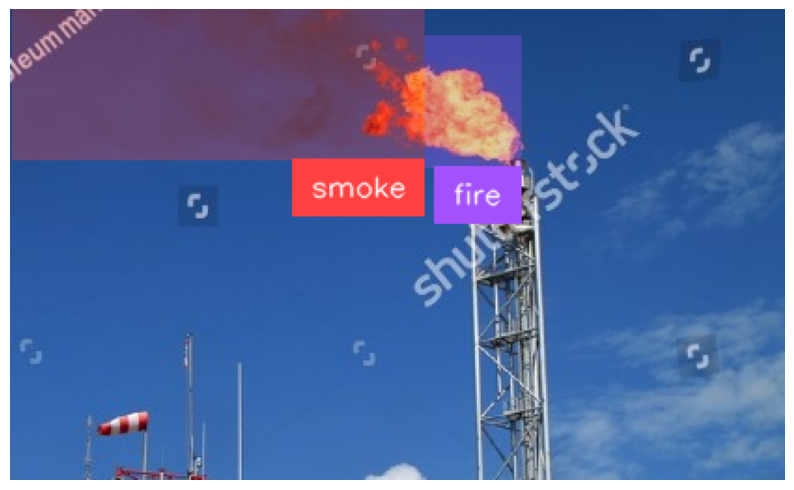

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: fire has been detected in the image
- Detection 2: smoke has also been detected in the image


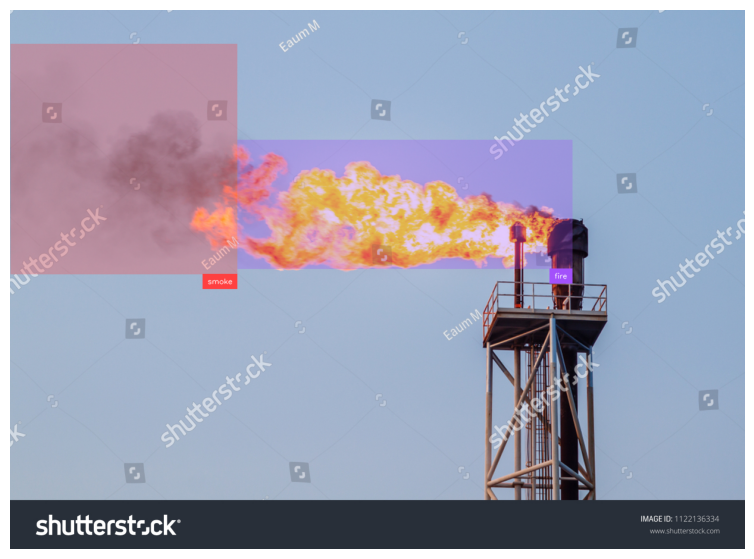

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: fire has been detected in the image


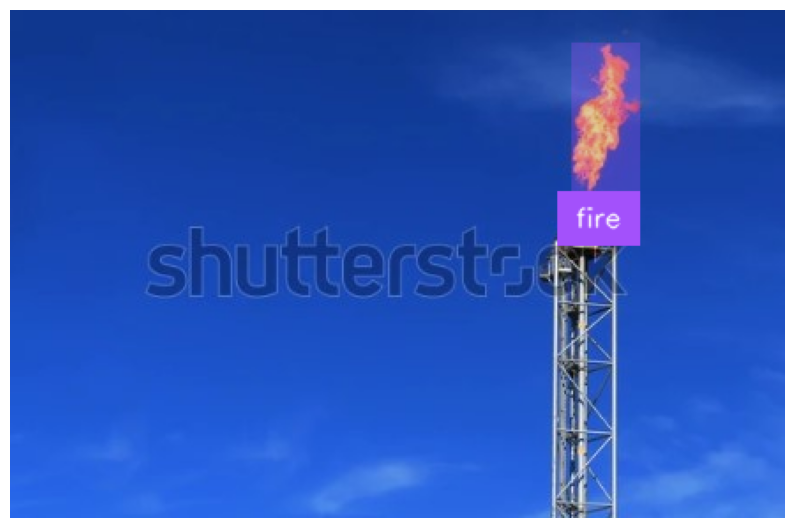

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: smoke has been detected in the image
- Detection 2: fire has also been detected in the image


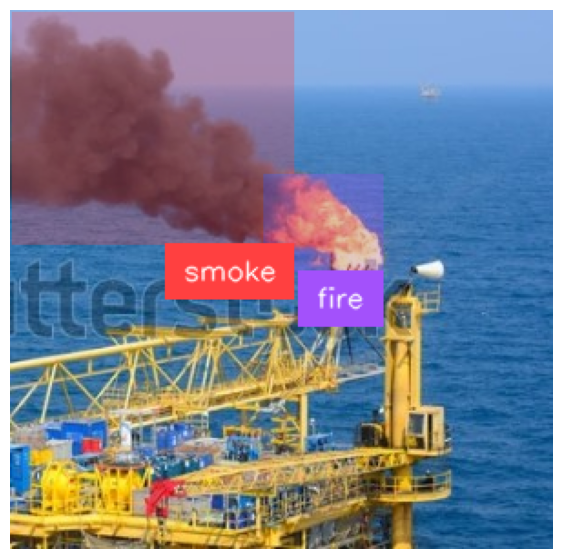

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: smoke has been detected in the image
- Detection 2: fire has also been detected in the image


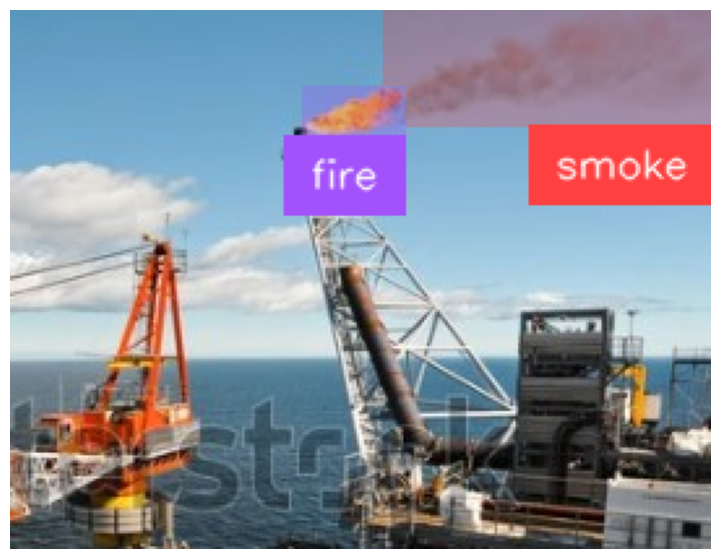

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: fire has been detected in the image


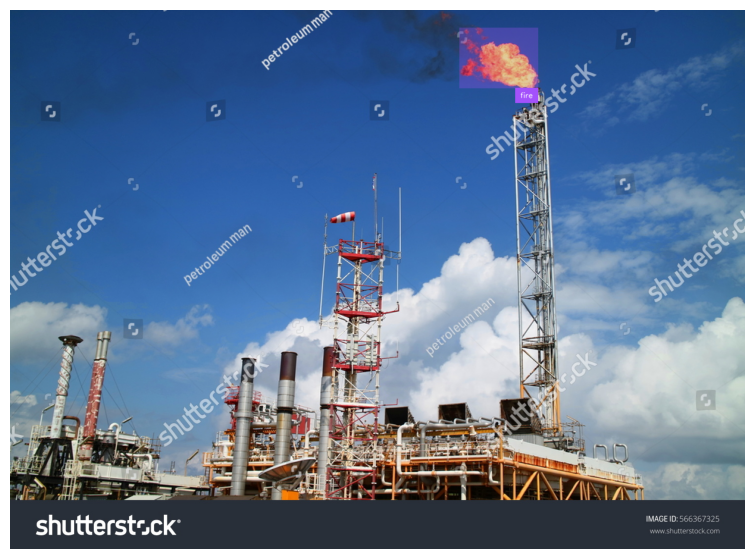

loading Roboflow workspace...
loading Roboflow project...
Making detection on the image...
- Detection 1: fire has been detected in the image


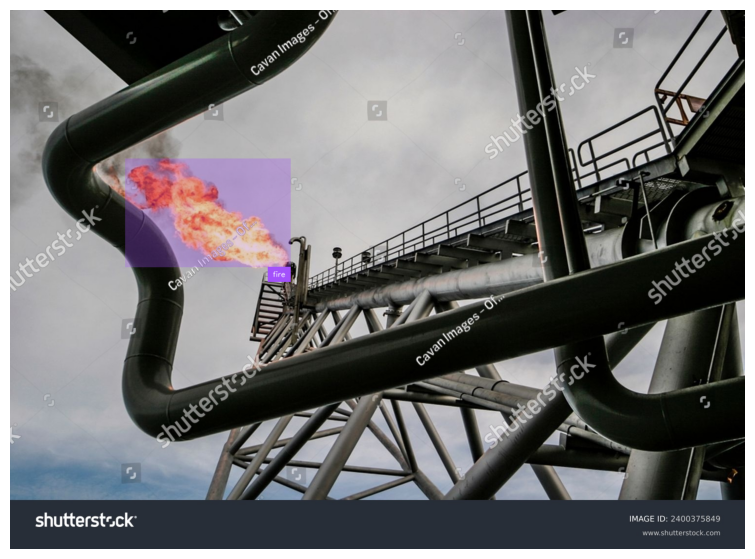

In [4]:
data_folder = './data'
image_paths = []

for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            image_paths.append(image_path)
            make_inference(image_path)